**Андрей, привет!**

Приятно познакомиться! Это Алексей Каргин, предлагаю общаться на «ты». Если это неприемлемо, будет здорово, если я об этом узнаю, и мы перейдем на «вы». Для удобства я оставлю комментарии в отдельных ячейках Markdown с заголовком «Комментарий тимлида». Пожалуйста, не перемещай, не изменяй и не удаляй их - так наше общение будет более продуктивным. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий тимлида</b> 
    
✍ Так выделены самые важные замечания. Без их отработки декомпозиция не будет принята.
</div>

<div class="alert alert-warning">
<b>Комментарий тимлида</b> 
    
📝 Так выделены небольшие замечания или рекомендации. Будет здорово, если эти замечания будут учтены в будущем проекте. 
</div>

<div class="alert alert-success">
<b>Комментарий тимлида</b> 
    
👍 Так выделены все остальные комментарии, включая позитивные моменты и другие рекомендации.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Например, вот так. Таким же образом можно что-то спросить, и я постараюсь ответить.
</div>

---

<div class="alert alert-success">
<b>Обратная связь v.1</b> 
    
Андрей, спасибо, что прислал декомпозицию. В целом она отвечает поставленным задачам, ты здорово оформил вводную часть,<span class="text-danger">но нам нужно привести формулировку двух нулевых гипотез</span> , без них я не могу принять декомпозицию. 
       
<br>    
С наилучшими пожеланиями, <br>
Алексей Каргин

</div>

---

<div class="alert alert-success">
<b>Обратная связь v.2</b> 
    
Андрей, что добавил формулировку гипотез. В целом теперь можно приступать к самому проекту. Обрати, пожалуйста, внимание, что в целом две гипотезы говорят об одном и том же, поскольку в выручку заложен средний чек. Также, лучше всегда нулевую гипотезу формулировать о том, что нет различий или выборки равны. А в качестве альтернативно уже указывать, что между средними или нет равенства, или предполагать увеличение или уменьшение среднего значения. Если в ходе проекта найдешь что-то интересно, то лучше измени вторую гипотезу.
       
<br>    
С наилучшими пожеланиями, <br>
Алексей Каргин

</div>

---


# Проект "Телеком" #

# Содержание #

<a id='import_libs'></a>
# Импорт библиотек #

In [ ]:
# !pip install --user plotly==5.8.0
# !pip install --user plotly_express
# !pip install --user pandas-profiling

In [89]:
import os
import warnings
from datetime import datetime as dt

import numpy as np
from IPython.display import Image
import  pandas as pd
# from pandas_profiling import ProfileReport
import plotly_express as px
from plotly.subplots import make_subplots

pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')
random_state = 7

<a id='description'></a>
# Описание проекта #
1. Анализ экономической эффективности использования услуг, предоставляемых абонентам в рамках тарифного плана;
2. Разработка рекомендаций по повышению экономической эффективности услуг, предоставляемых абонентам в рамках тарифного плана;
3. Заказчики:
    * директор комерческого департамента;
    * комерческий департамент;

<a id='purpose'></a>
# Цель проекта #
1. Повышение прибыли в долгосрочной перспективе.
2. Снижение оттока абонентов.

<a id='tariffs'></a>
# Тарификация #
1. посттарификация. дата выставления счета: 01 число каждого месяца;
2. неистраченные пакеты услуг на следующий месяц не переносятся;
3. округление общей длительности вызовов за месяц, до минуты, в большую сторону;
4. 100 руб. за каждого уникального оператора;

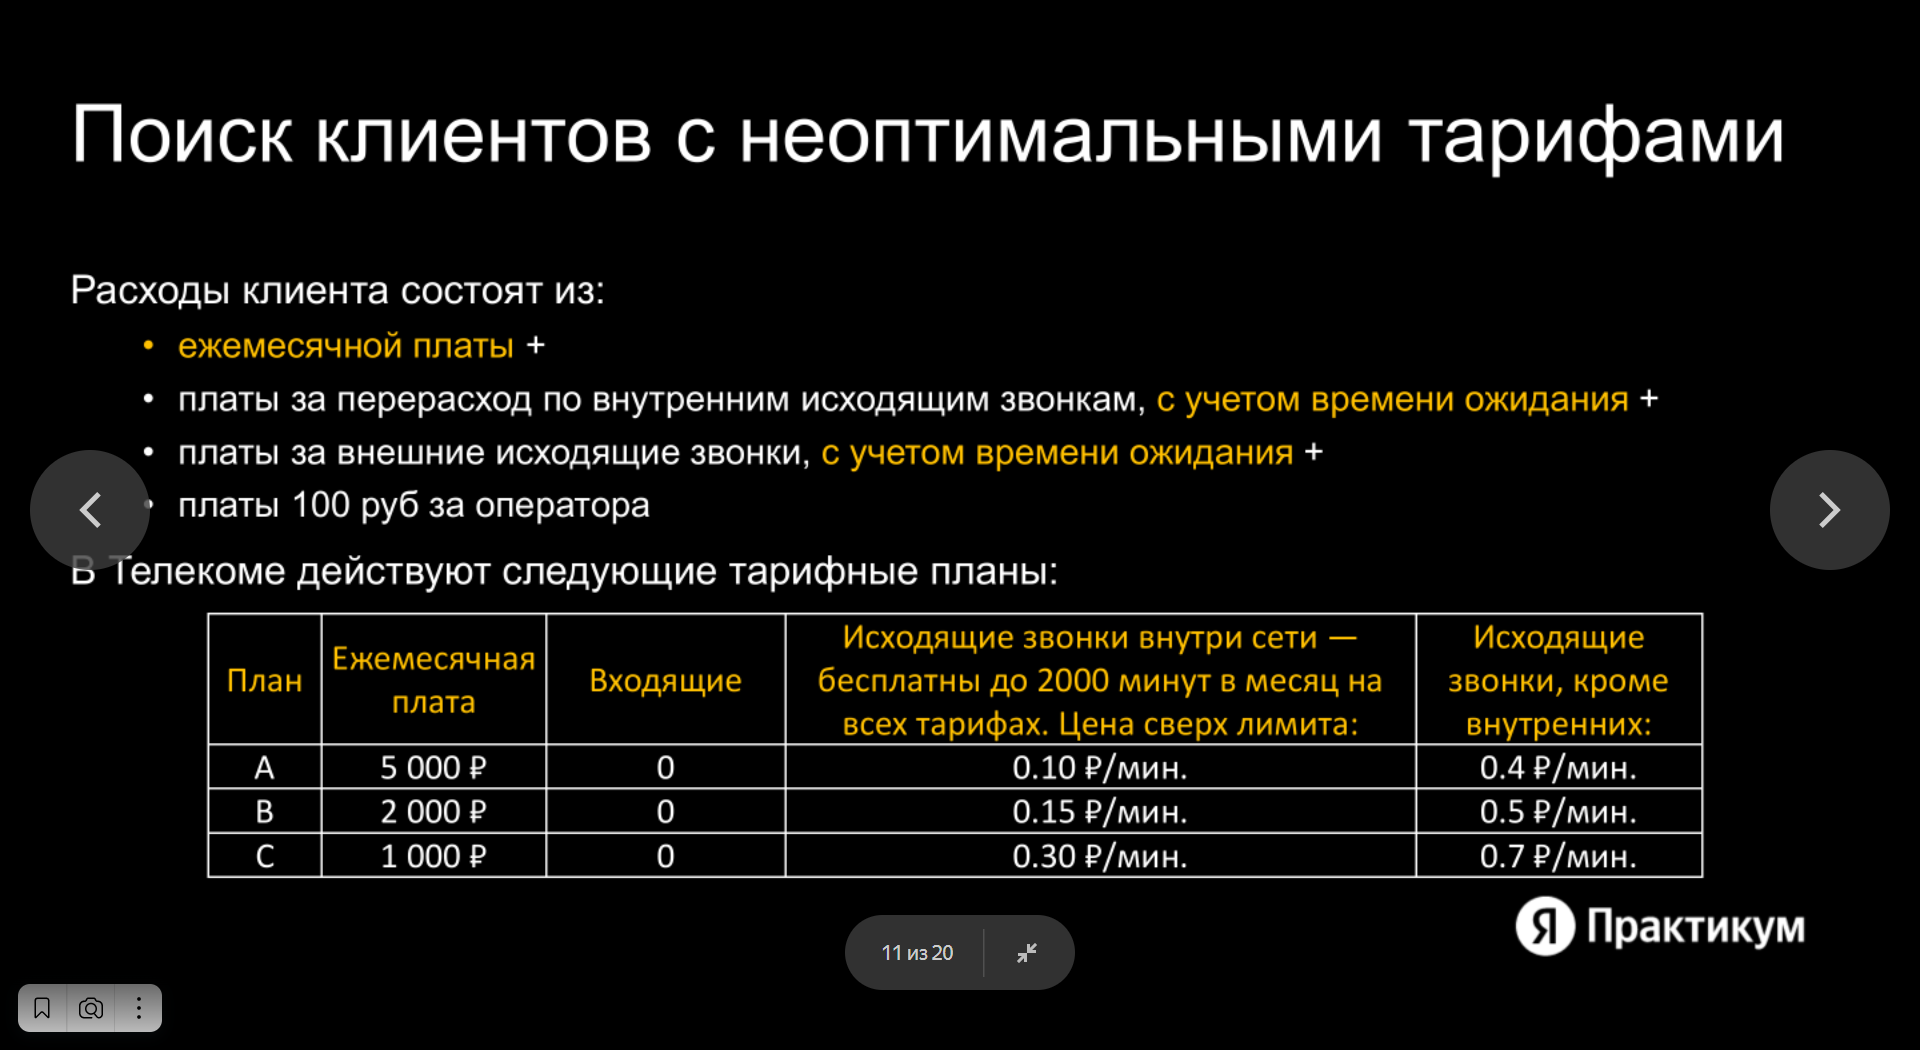

In [6]:
Image("img/tariffs.png")

<a id='data_descriptions'></a>
# Описание данных #
<b>telecom_datasets</b>

1. user_id - уникальный идентификатор абонента;
2. date - дата предоставления услуги;
3. direction - тип вызова:
    * out - исходящий;
    * in - входящий;
4. internal - маркер внутренних\внешних вызовов;
5. operator_id - уникальный идентифиакатор оператора;
6. is_missed_calls - маркер пропущенного вызова;
7. calls_count - количество звонков;
8. call_duration - длительность всех звонков, без учета времени ожидания;
9. total_call_duration - длительность всех звонков, с учетом времени ожидания;

<b>telecom_clients</b>
1. user_id — идентификатор клиента;
2. tariff_plan — тарифный план клиента;
3. date_start — дата регистрации клиента в сервисе;

<a id='requirements'></a>
# Требования к решению #
1. Jupyter Notebook:
    * расчеты;
    * пояснения результатов;
    * выводы;
    * список клиентов использующих услуги неэффективно;
2. Презентация.
3. Dashboard:

    <b>* Набор №1:</b>
    * гистограмма распределения длительности звонков;
    * круговая диаграмма, отображающую соотношение кол-ва внутренних и внешних вызовов;
    * фильтр дашборда по направлению вызовов;

    <b>* Набор №2:</b>

    * диаграмма количества вызовов по дням;
    * круговая диаграмма, отображающую соотношение кол-ва входящих и исходящих вызовов;
    * фильтр дашборда по типу вызова (внешний или внутренний);

 <a id='work plan'></a>
 # План проведения работ #
 1. предобработка данных:
    * первичный осмотр данных;
    * приведение типов данных;
    * работа с аномалиями;
    * работа с пропусками;
    * поиск дубликатов;
 2. исследовательский анализ данных:
    * изучение динамики работы клиентов;
    * выделение активных клиентов;
    * изучение выручки компании за последний месяц;
    * изучение выручки компании за весь период;
    * анализ значения среднего чека за весь период;
    * кластеризация клиентов;
    * анализ изменения выручки в случае перехода на оптимальные тарифы;
 3. Проверка гипотез:
    * Гипотеза 1:
    
    $H_0$: выручка, после перехода абонентов на выгодные тарифы, останется прежней.
    
    $H_1$: выручка, после перехода абонентов на выгодные тарифы, изменится.
    
    * Гипотеза 2:
    
    $H_0$: средний чек абонента, после перехода на выгодный тариф, станет меньше.
    
    $H_1$: средний чек абонента, после перехода на выгодный тариф, останется прежним.

<a id='data'></a>
# Предобработка данных #

In [50]:
path_1 = 'datasets/'
path_2 = '/datasets/'
file_clients = 'telecom_clients.csv'
file_data = 'telecom_dataset.csv'
path_clients =''
path_data = ''

if os.path.exists(path_1):
    path_clients = path_1 + file_clients
    path_data = path_1 + file_data
elif os.path.exists(path_2):
    path_clients = path_2 + file_clients
    path_data = path_2 + file_data
else: print('Данные отсутствуют. Проверьте путь к папкам с данными')

data = pd.read_csv(filepath_or_buffer=path_data)
clients = pd.read_csv(filepath_or_buffer=path_clients)
display(data.head(5))
display(clients.head(5))

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


<a id='data_preview_data'></a>
## Первичный осмотр data ##

In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


<a id='data_preview_clients'></a>
## Первичный осмотр clients ##

In [12]:
clients.info()
clients.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


## Итоги первичного осмотра данных ##
1. датафрейм data(telecom_datasets):
    * 'date' - привести к типу 'date'
    * 'direction' - привести к типу 'category'
    * 'internal' - привести к типу bool
    * 'operator_id' - подумать как поступить с пропущенными значениями
2. датафрейм clients(telecom_clients):
    * 'tariff_plan' - привести к типу 'category'
    * 'date_start' - привести к типу date

<a id='data_convert'></a>
## Приведение типов ##

In [51]:
data['date'] = pd.to_datetime(data['date'].apply(lambda x: dt.date(pd.to_datetime(x))))
data['direction'] = data['direction'].astype('category')
data['internal'] = data['internal'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  category      
 3   internal             53902 non-null  bool          
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(2), category(1), datetime64[ns](1), float64(1), int64(4)
memory usage: 2.6 MB


In [56]:
clients['tariff_plan'] = clients['tariff_plan'].astype('category')
clients['date_start'] = pd.to_datetime(clients['date_start'])
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    category      
 2   date_start   732 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 12.4 KB


<a id='data_anomaly'></a>
## Аномалии ##
Вероятность мошенничества на уровне представленных данных: минимальная;
Представленные количественные показатели:
    * calls_count
      - конвертация в деньги: не оплачивается
      - фрод: не имеет смысла
    * call_duration
      - конвертация в деньги: возможна
      - фрод: высокая вероятность
    * total_call_duration
      - конвертация в деньги: возможна
      - фрод: высокая вероятность
Вероятная длительность работы сотрудников:
    * смена 8 часов  = 28800 сек
    * смена 4 часа   = 14400 сек

In [82]:
duration_agg = data.groupby(by=['operator_id', 'date'], as_index=False).agg({'total_call_duration': np.sum})

fig = px.line(data_frame=duration_agg,
              x='date',
              y='total_call_duration',
              color='operator_id',
              template='seaborn',
              title='Длительность звонков операторов',
              labels={'total_call_duration':'Длительность звонков',
                      'date':'Дата'})

fig.add_shape(type='line',
              line=dict(dash="dashdot"),
              line_color='salmon',
              x0=duration_agg['date'].min(),
              x1=duration_agg['date'].max(),
              y0=28800,
              y1=28800,
              line_width=3)

fig.add_shape(type='line',
              line=dict(dash="dashdot"),
              line_color='green',
              x0=duration_agg['date'].min(),
              x1=duration_agg['date'].max(),
              y0=14400,
              y1=14400,
              line_width=3)

fig.show()

In [ ]:
duration_agg['anomaly'] = duration_agg['total_call_duration'].apply(lambda x: 1 if x > 28800 else 0)

In [ ]:
fig = make_subplots(rows=5, cols=13, column_titles=list(data.drop(columns=['churn', 'cluster_km']).columns), shared_xaxes=True)

In [88]:
fig = px.pie(data_frame=duration_agg,
             names='anomaly',
             values='total_call_duration',
             template='seaborn')
fig = px.pie(data_frame=duration_agg,
             names='anomaly',
             template='seaborn')
fig.show()

## Результаты анализа длительности звонков сотрудников ##
1. длительность смены оператора = 8 часов
2. операторы с аномальной длительностью звонков:
    * 885876
    * 885890
    * 925922
    * 929428

In [72]:
data.groupby(by=['operator_id', 'date'], as_index=False).agg({'total_call_duration': np.sum}).sort_values(by='total_call_duration', ascending=False)

,operator_id,date,total_call_duration
832,885876.0,2019-09-10,222538
847,885876.0,2019-09-25,189989
853,885876.0,2019-10-01,183741
845,885876.0,2019-09-23,177137
848,885876.0,2019-09-26,172165
...,...,...,...
10822,919192.0,2019-10-16,0
11978,921102.0,2019-10-25,0
1379,888868.0,2019-09-01,0
13622,928926.0,2019-10-27,0


In [65]:
data

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18
4,166377,2019-08-05,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15,out,True,957922.0,False,4,3130,3190
